In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr
import numpy as np
import json
import requests


In [2]:
# Study data files
restaurants_data_path = "Resources/clean_rest_data.csv"
covid19_test_path = "Resources/covid19cases_test.csv"

In [3]:
# Read the data and the study results
restaurants_ca_df = pd.read_csv(restaurants_data_path)
covid_cases_df = pd.read_csv(covid19_test_path)

In [4]:
num_dataset = restaurants_ca_df.shape
print(num_dataset)

(16936, 11)


In [5]:
len(restaurants_ca_df)

16936

In [6]:
restaurants_ca_df.columns

Index(['County_Name', 'FIPS_County', 'date', 'Business_Type', 'Action',
       'order_group', 'order_code', 'Current_order_status', 'Effective_date',
       'Date_Signed', 'Citation'],
      dtype='object')

In [7]:
# Checking the number of counties
total_num_counties = len(restaurants_ca_df['County_Name'].unique())
total_num_counties 

58

In [8]:
restaurants_ca_df.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alameda County,1,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Alameda County,1,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Alameda County,1,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Alameda County,1,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Alameda County,1,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"


In [9]:
la_citation = restaurants_ca_df.loc[restaurants_ca_df['County_Name']=='Los Angeles County']['Citation'].value_counts()
la_citation

Cal. Health Order (July 13, 2020)                          49
Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)               46
Cal. Health Order (May 7, 2020)                            21
Cal. County Tier Assesssment (Nov. 11 2020)                14
Cal. County Tier Assessment (Sept. 21, 2020)               14
5.29.20 County variance - Coronavirus COVID-19 Response    12
Cal. County Tier Assesssment (Oct. 6, 2020)                 8
Cal. County Tier Assessment (Aug. 31, 2020)                 8
Cal. County Tier Assesssment (Oct. 19, 2020)                7
Cal. County Tier Assesssment (Oct. 27, 2020)                7
Cal. County Tier Assessment (Dec. 22, 2020)                 7
Cal. HD Guidance on Closure of Sectors (July 1, 2020)       7
Cal. County Tier Assesssment (Sept. 28, 2020)               7
Cal. County Tier Assesssment (Nov. 4, 2020)                 7
Cal. County Tier Assessment (Oct. 12, 2020)                 7
Cal. County Tier Assessment (Sept. 8, 2020)                 7
6.25.20 

In [10]:
la_citation_sum = la_citation.sum()
la_citation_sum

292

In [11]:
# Search top5 counties related to covid 19 cases
la_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Los Angeles County"]

In [12]:
san_bernardino_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "San Bernardino County"]

In [13]:
riverside_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Riverside County"]

In [14]:
san_diego_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "San Diego County"]

In [15]:
oc_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Orange County"]

In [16]:
# Search bottom5 counties related to covid 19 cases
sierra_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Sierra County"]

In [17]:
alpine_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Alpine County"]

In [18]:
trinity_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Trinity County"]

In [19]:
modoc_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Modoc County"]

In [20]:
mariposa_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Mariposa County"]

In [21]:
# the total number of citation per county

total_num_citations = restaurants_ca_df['Citation'].count() / total_num_counties
total_num_citations

292.0

In [22]:
Top5_counties_total_citation = {
    "Los Angeles": [total_num_citations],
    "San Bernardino": [total_num_citations], 
    "Riverside": [total_num_citations],
    "San Diego": [total_num_citations],
    "Orange": [total_num_citations]}


Top5_total = pd.DataFrame(data= Top5_counties_total_citation)

Top5_total_transposed = Top5_total.T

Top5_total.columns.names = ['Counties']

Top5_total_transposed

,0
Counties,
Los Angeles,292.0
San Bernardino,292.0
Riverside,292.0
San Diego,292.0
Orange,292.0


In [23]:
# counties citation - covid19 response
la_covid19_response = la_list[la_list['Citation'].str.contains("COVID-19")].value_counts()
san_bernardino_covid19_response = san_bernardino_list[san_bernardino_list['Citation'].str.contains("COVID-19")].value_counts()
riverside_response = riverside_list[riverside_list['Citation'].str.contains("COVID-19")].value_counts()
san_diego_response = san_diego_list[san_diego_list['Citation'].str.contains("COVID-19")].value_counts()
oc_covid19_response = oc_list[oc_list['Citation'].str.contains("COVID-19")].value_counts()


sierra_covid19_response = sierra_list[sierra_list['Citation'].str.contains("COVID-19")].value_counts()
alpine_covid19_response = alpine_list[alpine_list['Citation'].str.contains("COVID-19")].value_counts()
trinity_covid19_response = trinity_list[trinity_list['Citation'].str.contains("COVID-19")].value_counts()
modoc_covid19_response = modoc_list[modoc_list['Citation'].str.contains("COVID-19")].value_counts()
mariposa_covid19_response = mariposa_list[mariposa_list['Citation'].str.contains("COVID-19")].value_counts()

In [24]:
num_la_response = len(la_covid19_response)

In [25]:
num_san_bernardino_response =len(san_bernardino_covid19_response)

In [26]:
num_riverside_response = len(riverside_response)

In [27]:
num_san_diego_response = len(san_diego_response)

In [28]:
num_oc_response = len(oc_covid19_response)

In [32]:
# Create a dataframe for number of covid19 citation by selecting counties

Top5_counties_covid19_citation = pd.DataFrame({
    "Los Angeles": [num_la_response],
    "San Bernardino": [num_san_bernardino_response], 
    "Riverside": [num_riverside_response],
    "San Diego": [num_san_diego_response],
    "Orange": [num_oc_response]
     
})


Top5_counties_covid19_citation




,Los Angeles,San Bernardino,Riverside,San Diego,Orange
0,38,45,45,45,45


In [33]:
Top5_covid19_citation ={
    "Los Angeles": [num_la_response],
    "San Bernardino": [num_san_bernardino_response], 
    "Riverside": [num_riverside_response],
    "San Diego": [num_san_diego_response],
    "Orange": [num_oc_response]}

Top5 = pd.DataFrame(data= Top5_covid19_citation)

Top5_transposed = Top5.T

Top5.columns.names = ['Counties']

Top5_transposed

,0
Counties,
Los Angeles,38
San Bernardino,45
Riverside,45
San Diego,45
Orange,45


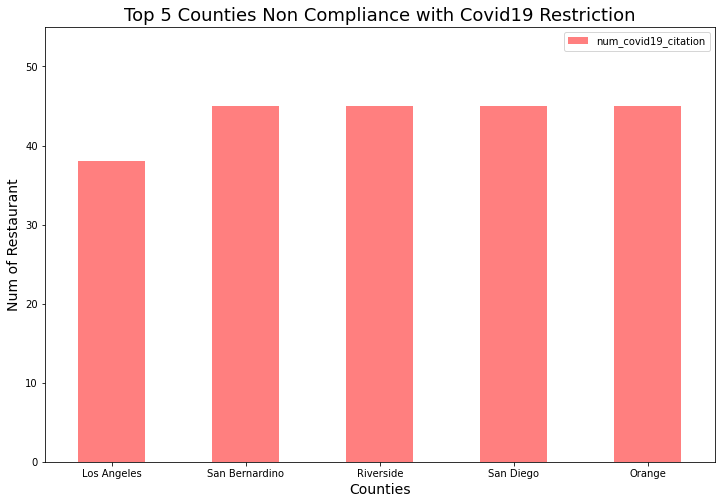

In [34]:
num_covid19_citation = [38, 45 ,45,45,45]
index = ['Los Angeles', "San Bernardino","Riverside","San Diego","Orange"]

df = pd.DataFrame({'num_covid19_citation' : num_covid19_citation}, index = index)
ax = df.plot.bar(rot=0,color = "r" ,figsize=(12, 8), alpha = 0.5 , align = 'center')
ax.legend(loc=0)

plt.title('Top 5 Counties Non Compliance with Covid19 Restriction',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Num of Restaurant',size = 14)
plt.ylim(0,55)

plt.savefig('output_data/top5 counties non compliance')
plt.show()

In [35]:
num_sierra_response = len(sierra_covid19_response)

In [36]:
num_alpine_response = len(alpine_covid19_response)

In [37]:
num_trinity_response = len(trinity_covid19_response)

In [38]:
num_modoc_response = len(modoc_covid19_response) 

In [39]:
num_mariposa_response = len(mariposa_covid19_response)

In [40]:
Bottom5_counties_covid19_citation = pd.DataFrame({
    "Sierra":[num_sierra_response],
    "Alpine": [num_alpine_response], 
    "Trinity": [num_trinity_response],
    "Modoc": [num_modoc_response],
    "Mariposa": [num_mariposa_response]
})

Bottom5_counties_covid19_citation.index.name = "number of Covid-19 Response"
Bottom5_counties_covid19_citation

,Sierra,Alpine,Trinity,Modoc,Mariposa
number of Covid-19 Response,,,,,
0,53,45,52,53,53


In [41]:
bottom5_covid19_citation ={
   "Sierra":[num_sierra_response],
    "Alpine": [num_alpine_response], 
    "Trinity": [num_trinity_response],
    "Modoc": [num_modoc_response],
    "Mariposa": [num_mariposa_response]
}

bottom5 = pd.DataFrame(data= bottom5_covid19_citation)

bottom5_transposed = bottom5.T

bottom5.columns.names = ['Counties']
bottom5_transposed

,0
Counties,
Sierra,53
Alpine,45
Trinity,52
Modoc,53
Mariposa,53


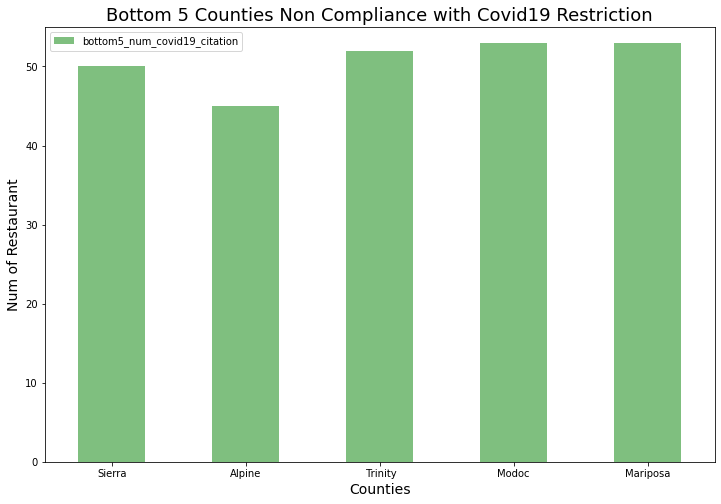

In [42]:
bottom5_num_covid19_citation = [50, 45 ,52,53,53]
index = ['Sierra', "Alpine"," Trinity","Modoc","Mariposa"]

df = pd.DataFrame({'bottom5_num_covid19_citation' : bottom5_num_covid19_citation}, index = index)
ax = df.plot.bar(rot=0,color = "g" ,figsize=(12, 8), alpha = 0.5 , align = 'center')
ax.legend(loc=0)

plt.title('Bottom 5 Counties Non Compliance with Covid19 Restriction',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Num of Restaurant',size = 14)
plt.ylim(0,55)

plt.savefig('output_data/bottom5 counties non compliance')
plt.show()

In [43]:
# the percentage of noncompliance with Covid19 per county (Top5)
la_response = num_la_response / total_num_citations * 100

In [44]:
san_bernardino_response = num_san_bernardino_response / total_num_citations * 100

In [45]:
riverside_response = num_riverside_response / total_num_citations * 100

In [46]:
san_diego_response = num_san_diego_response / total_num_citations * 100

In [47]:
oc_response = num_oc_response / total_num_citations * 100

In [48]:
# the percentage of noncompliance with Covid19 per county (Bottom 5)
sierra_response = num_sierra_response / total_num_citations * 100

In [49]:
alpine_response = num_alpine_response / total_num_citations * 100

In [50]:
trinity_response = num_trinity_response / total_num_citations * 100

In [51]:
modoc_response = num_modoc_response / total_num_citations * 100

In [52]:
mariposa_response = num_mariposa_response / total_num_citations * 100

In [53]:
top5_percent_covid19_citation = pd.DataFrame({
    "Los Angeles": [la_response],
    "San Bernardino": [san_bernardino_response], 
    "Riverside": [riverside_response],
    "San Diego": [san_diego_response],
    "Orange": [oc_response],
   
})

top5_percent_covid19_citation["Los Angeles"]= top5_percent_covid19_citation["Los Angeles"].map("{0:,.2f}".format)
top5_percent_covid19_citation["San Bernardino"]= top5_percent_covid19_citation["San Bernardino"].map("{0:,.2f}".format)
top5_percent_covid19_citation["Riverside"]= top5_percent_covid19_citation["Riverside"].map("{0:,.2f}".format)
top5_percent_covid19_citation["San Diego"]= top5_percent_covid19_citation["San Diego"].map("{0:,.2f}".format)
top5_percent_covid19_citation["Orange"]= top5_percent_covid19_citation["Orange"].map("{0:,.2f}".format)


top5_percent_covid19_citation

,Los Angeles,San Bernardino,Riverside,San Diego,Orange
0,13.01,15.41,15.41,15.41,15.41


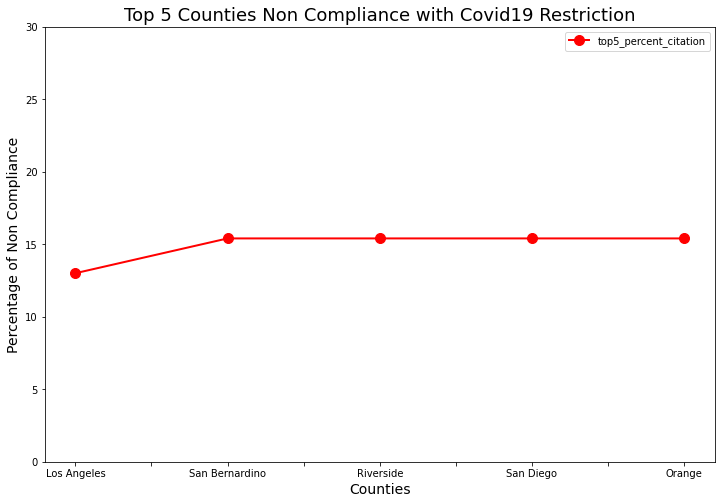

In [54]:
top5_percent_citation = [13.01, 15.41 ,15.41,15.41,15.41]
index = ['Los Angeles', "San Bernardino","Riverside","San Diego","Orange"]

df = pd.DataFrame({'top5_percent_citation' : top5_percent_citation}, index = index)
ax = df.plot.line(rot=0,figsize=(12, 8),linewidth = 2, markersize = 10, marker='o', color='red')
ax.legend(loc=0)

plt.title('Top 5 Counties Non Compliance with Covid19 Restriction',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Percentage of Non Compliance',size = 14)
plt.ylim(0,30)

plt.savefig('output_data/top5 counties percentage')
plt.show()



In [55]:
bottom5_percent_covid19_citation = pd.DataFrame({
    "Sierra":[sierra_response],
    "Alpine": [alpine_response], 
    "Trinity": [trinity_response],
    "Modoc": [modoc_response],
    "Mariposa": [mariposa_response]})


bottom5_percent_covid19_citation["Sierra"]= bottom5_percent_covid19_citation["Sierra"].map("{0:,.2f}".format)
bottom5_percent_covid19_citation["Alpine"]= bottom5_percent_covid19_citation["Alpine"].map("{0:,.2f}".format)
bottom5_percent_covid19_citation["Trinity"]= bottom5_percent_covid19_citation["Trinity"].map("{0:,.2f}".format)
bottom5_percent_covid19_citation["Modoc"]= bottom5_percent_covid19_citation["Modoc"].map("{0:,.2f}".format)
bottom5_percent_covid19_citation["Mariposa"]= bottom5_percent_covid19_citation["Mariposa"].map("{0:,.2f}".format)



bottom5_percent_covid19_citation


,Sierra,Alpine,Trinity,Modoc,Mariposa
0,18.15,15.41,17.81,18.15,18.15


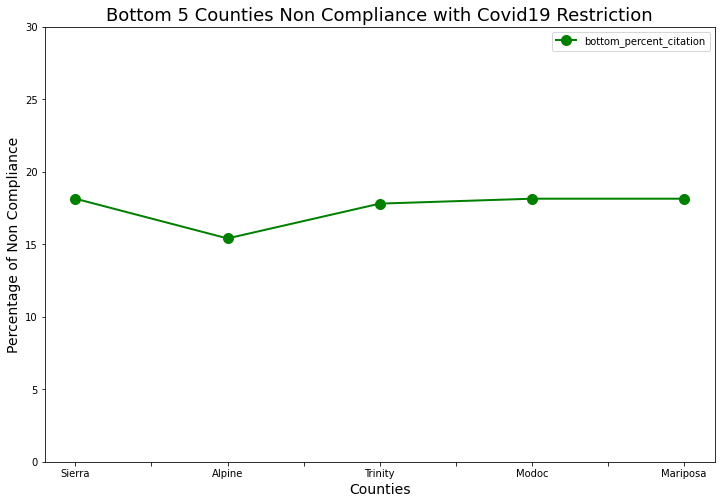

In [56]:
bottom_percent_citation = [18.15, 15.41 ,17.81,18.15,18.15]
index = ["Sierra", "Alpine","Trinity","Modoc","Mariposa"]

df = pd.DataFrame({'bottom_percent_citation' : bottom_percent_citation}, index = index)
ax = df.plot.line(rot=0,figsize=(12, 8),linewidth = 2, markersize = 10, marker='o', color='g')
ax.legend(loc=0)

plt.title('Bottom 5 Counties Non Compliance with Covid19 Restriction',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Percentage of Non Compliance',size = 14)
plt.ylim(0,30)

plt.savefig('output_data/bottom5 counties percentage')
plt.show()

In [57]:
# top five counties 
la_action = la_list.loc[la_list["County_Name"] == "Los Angeles County"]['Action'].value_counts()

In [58]:
san_bernardino_action = san_bernardino_list.loc[san_bernardino_list["County_Name"] == "San Bernardino County"]['Action'].value_counts()

In [59]:
riverside_action =riverside_list.loc[riverside_list["County_Name"] == "Riverside County"]['Action'].value_counts()

In [60]:
san_diego_action = san_diego_list.loc[san_diego_list["County_Name"] == "San Diego County"]['Action'].value_counts()

In [61]:
oc_action = oc_list.loc[oc_list["County_Name"] == "Orange County"]['Action'].value_counts()

In [62]:
top5_counties = pd.DataFrame({
    "Los Angeles":la_action,
    "San Bernardino": san_bernardino_action, 
    "Riverside": riverside_action,
    "San Diego": san_diego_action,
    "Orange": oc_action
    
})
top5_counties

,Los Angeles,San Bernardino,Riverside,San Diego,Orange
Open with social distancing/reduced seating/enhanced sanitation,191,198,198,198,198
Curbside/carryout/delivery only,97,90,90,90,90
none,4,4,4,4,4


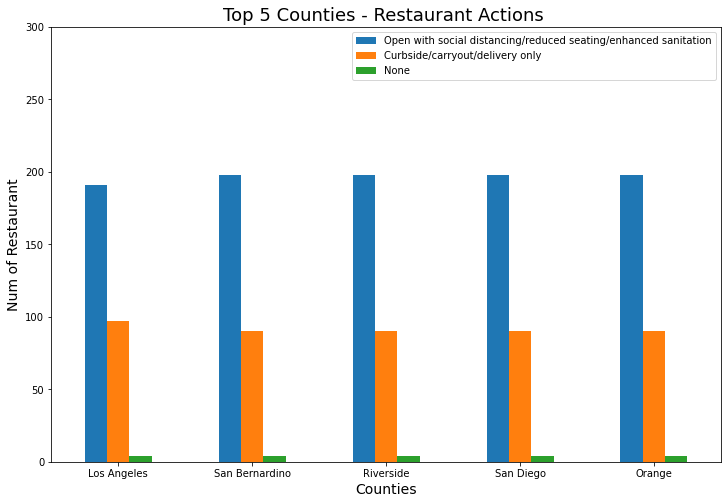

In [63]:
open_limitations = [191,198,198,198,198]
curbside = [97,90,90,90,90]
none = [4,4,4,4,4]

index = ['Los Angeles', "San Bernardino","Riverside","San Diego","Orange"]

df = pd.DataFrame({'Open with social distancing/reduced seating/enhanced sanitation' : open_limitations,
                  'Curbside/carryout/delivery only' : curbside, 
                  'None': none},index = index)

ax = df.plot.bar(rot=0, figsize=(12, 8), align = 'center')


plt.title('Top 5 Counties - Restaurant Actions ',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Num of Restaurant',size = 14)
plt.ylim(0,300)

plt.savefig('output_data/top5 action')
plt.show()


In [64]:
# buttom five counties

sierra_action  =sierra_list.loc[sierra_list["County_Name"] == "Sierra County"]['Action'].value_counts()

In [65]:
alpine_action  = alpine_list.loc[alpine_list["County_Name"] == "Alpine County"]['Action'].value_counts()

In [66]:
trinity_action = trinity_list.loc[trinity_list["County_Name"] == "Trinity County"]['Action'].value_counts()

In [67]:
modoc_action = modoc_list.loc[modoc_list["County_Name"] == "Modoc County"]['Action'].value_counts()

In [68]:
mariposa_action = mariposa_list.loc[mariposa_list["County_Name"] == "Mariposa County"]['Action'].value_counts()

In [69]:
bottom5_counties = pd.DataFrame({
    "Sierra":sierra_action,
    "Alpine": alpine_action, 
    "Trinity": trinity_action,
    "Modoc": modoc_action,
    "Mariposa": mariposa_action
    
})

In [70]:
bottom5_counties

,Sierra,Alpine,Trinity,Modoc,Mariposa
Open with social distancing/reduced seating/enhanced sanitation,211,203,231,232,206
Curbside/carryout/delivery only,77,85,57,56,82
none,4,4,4,4,4


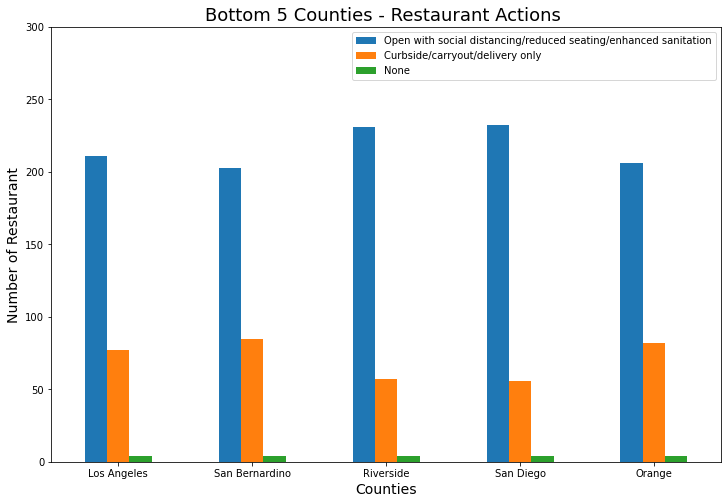

In [71]:
open_limitations = [211,203,231,232,206]
curbside = [77,85,57,56,82]

index = ['Los Angeles', "San Bernardino","Riverside","San Diego","Orange"]

df = pd.DataFrame({'Open with social distancing/reduced seating/enhanced sanitation' : open_limitations,
                  'Curbside/carryout/delivery only' : curbside,
                  'None':none},index = index)

ax = df.plot.bar(rot=0, figsize=(12, 8), align = 'center')


plt.title('Bottom 5 Counties - Restaurant Actions ',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Number of Restaurant',size = 14)
plt.ylim(0,300)

plt.savefig('output_data/bottom5 action')

plt.show()

In [72]:
len(covid_cases_df)

27450

In [73]:
cases_by_coutnty = covid_cases_df.loc[ covid_cases_df["area_type"]=="County",:]

In [74]:
len(cases_by_coutnty)

27000

In [75]:
avg_cases_by_county_df = cases_by_coutnty.groupby(['area']).mean().reset_index()
avg_cases_by_county_df.head()

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Alameda,1685886.0,204.612827,2.973872,5509.685969,223.759465,191.471111,2.791111,5898.415730
1,Alpine,1117.0,0.206651,0.000000,4.329621,0.080178,0.193333,0.000000,2.657303
2,Amador,38531.0,8.650831,0.109264,254.271715,9.300668,8.095556,0.102222,190.404494
3,Butte,217769.0,27.812352,0.465558,466.910913,27.625835,26.020000,0.435556,512.095506
4,Calaveras,44289.0,4.921615,0.118765,88.138085,5.180401,4.604444,0.111111,86.401685


In [76]:
avg_cases_by_county_df = avg_cases_by_county_df.sort_values(by='cases', ascending = False).reset_index(drop= True)
avg_cases_by_county_df.head()

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Los Angeles,10257557.0,2827.767221,56.520190,42318.993318,3408.314031,2646.600000,52.886667,64130.890449
1,San Bernardino,2217398.0,689.532067,10.729216,6280.982183,762.178174,645.237778,10.157778,7080.688202
2,Riverside,2468145.0,680.745843,10.344418,6253.768374,763.886414,637.002222,9.780000,6785.769663
3,San Diego,3370418.0,654.147268,8.769596,9154.717149,659.316258,612.026667,8.204444,11002.424157
4,Orange,3228519.0,599.669834,11.681710,8046.567929,686.118040,561.180000,10.931111,9274.530899


In [77]:
top5_covid_counties_df = avg_cases_by_county_df.iloc[ 0:5, :].reset_index(drop = True)
top5_covid_counties_df

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Los Angeles,10257557.0,2827.767221,56.520190,42318.993318,3408.314031,2646.600000,52.886667,64130.890449
1,San Bernardino,2217398.0,689.532067,10.729216,6280.982183,762.178174,645.237778,10.157778,7080.688202
2,Riverside,2468145.0,680.745843,10.344418,6253.768374,763.886414,637.002222,9.780000,6785.769663
3,San Diego,3370418.0,654.147268,8.769596,9154.717149,659.316258,612.026667,8.204444,11002.424157
4,Orange,3228519.0,599.669834,11.681710,8046.567929,686.118040,561.180000,10.931111,9274.530899


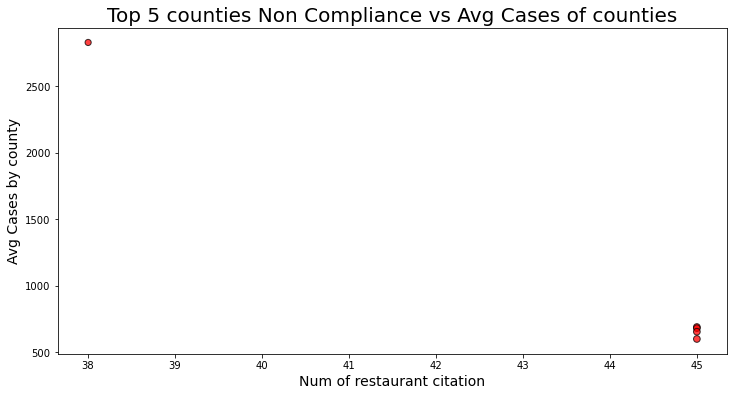

In [78]:
# Avg Cases of counties vs Top 5 counties Non Compliance with Covid19

fig1, ax1 = plt.subplots(figsize=(12, 6))

x_axis_data = Top5_transposed
y_axis_data = top5_covid_counties_df['cases']


plt.scatter(x_axis_data,y_axis_data, marker="o",facecolors="red", edgecolors="black",
            s=x_axis_data,alpha=0.75)

plt.title('Top 5 counties Non Compliance vs Avg Cases of counties',fontsize=20)
plt.xlabel('Num of restaurant citation', fontsize=14)         
plt.ylabel('Avg Cases by county', fontsize=14) 
marker_size = 20
plt.show()


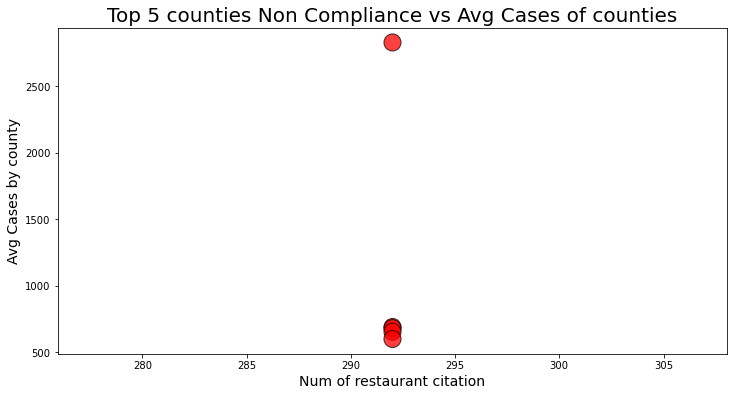

In [79]:
# Avg Cases of counties vs total Top5 counties of Citation

fig1, ax1 = plt.subplots(figsize=(12, 6))

x_axis_data =Top5_total_transposed
y_axis_data =top5_covid_counties_df['cases']

plt.scatter(x_axis_data,y_axis_data, marker="o",facecolors="red", edgecolors="black",
            s=x_axis_data,alpha=0.75)

plt.title('Top 5 counties Non Compliance vs Avg Cases of counties',fontsize=20)
plt.xlabel('Num of restaurant citation', fontsize=14)         
plt.ylabel('Avg Cases by county', fontsize=14) 
marker_size = 20
plt.show()